/tmp/ipython-input-183335046.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0151
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.0658e-04
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.7505e-04
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.3499e-04
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.6286e-04
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.7271e-04
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.2221e-04
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.3929e-04
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 3.2477e-04
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.7565e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


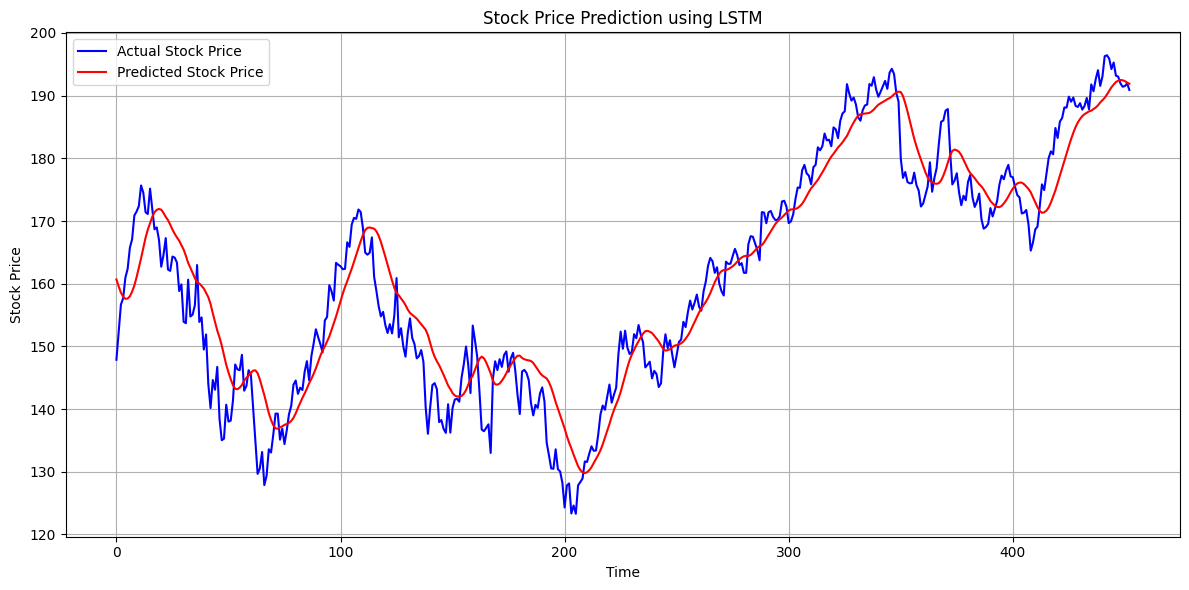

In [3]:
# Stock Price Prediction using LSTM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime

# Step 1: Load Data
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2023-12-31'
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Preprocessing
data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Create training and test sets
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size - 60:]  # 60 time steps

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Step 4: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Save and Load Model Weights (Keras 3.x compatible)
model.save_weights("model_weights.weights.h5")
model.load_weights("model_weights.weights.h5")



# Step 6: Make Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 7: Visualization
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()